# Twitter Sentiment Analysis

### 1. Importing Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### 2. Authentication

In [129]:
consumerKey = 'DnIMT4TKDREfAAteOoblx2A1X'
consumerSecretKey = 'EBApFJE5IuABdtqW0XZywoCevF8WjJm0CDBrtrIkbRdFw1Yjn2'
accessToken = '1543206987885731840-8uFlawZ5k0yo1u0ajNZDnrhzrZkK55'
accessTokenSecret = 'STlAVfCRrdcj7MnXs7k3n91sp19p59uImqF4WkVKw14GC'

In [130]:
#Authentication Object Creation
api = tweepy.Client(consumer_key= consumerKey,consumer_secret= consumerSecretKey,access_token= accessToken,access_token_secret= accessTokenSecret,bearer_token='AAAAAAAAAAAAAAAAAAAAAAyLeQEAAAAARQtiVHtbgumibQTkzdCU1A1I3Zs%3DHNSo4UrfDlj9G5v4GcvMxW7DrPYJjnJXqzippTUgmSMbsJ9qCL')

### 3. Getting the tweets

In [131]:
keyword = input("Enter the word to search: ")
count = int(input("Enter the number of tweets to be analyzed: "))

Enter the word to search: Election
Enter the number of tweets to be analyzed: 10


In [132]:
posts = [tweet.text for tweet in tweepy.Paginator(api.search_recent_tweets, query='{} lang:en'.format(keyword),
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=count) ]

In [133]:
posts[:10]

['RT @LOLGOP: 2 simple reasons GOP Justices would go with the “independent state legislature” BS:\n\n1. They’re giving up on winning the electo…',
 'RT @Thom_Hartmann: 1/ The Nightmare Scenario SCOTUS is Plotting For the 2024 Election Takeover:',
 'RT @Thom_Hartmann: 50/ That will not be the case in 2024. As we are watching, the Supreme Court — in collaboration with state legislatures…',
 'RT @sophielouisecc: Sadiq khan is under investigation for breaking election rules, I just thought you all should know since I haven’t seen…',
 'RT @ChuckCallesto: BREAKING REPORT: Langlade County Wisconsin GOP Joins Texas and Maricopa County Arizona to Unanimously Reject the Results…',
 'RT @Thom_Hartmann: 1/ The Nightmare Scenario SCOTUS is Plotting For the 2024 Election Takeover:',
 'RT @davidhogg111: The most impactful thing every young person can do this election is work in PA, AZ, MI, GA and FL to get senate seats and…',
 'RT @jennycohn1: Dominion lawsuit advances: Murdoch reportedly told Trump 

In [134]:
i=1
for post in posts:
    print(str(i) + '. ' + post + '\n')
    i=i+1

1. RT @LOLGOP: 2 simple reasons GOP Justices would go with the “independent state legislature” BS:

1. They’re giving up on winning the electo…

2. RT @Thom_Hartmann: 1/ The Nightmare Scenario SCOTUS is Plotting For the 2024 Election Takeover:

3. RT @Thom_Hartmann: 50/ That will not be the case in 2024. As we are watching, the Supreme Court — in collaboration with state legislatures…

4. RT @sophielouisecc: Sadiq khan is under investigation for breaking election rules, I just thought you all should know since I haven’t seen…

5. RT @ChuckCallesto: BREAKING REPORT: Langlade County Wisconsin GOP Joins Texas and Maricopa County Arizona to Unanimously Reject the Results…

6. RT @Thom_Hartmann: 1/ The Nightmare Scenario SCOTUS is Plotting For the 2024 Election Takeover:

7. RT @davidhogg111: The most impactful thing every young person can do this election is work in PA, AZ, MI, GA and FL to get senate seats and…

8. RT @jennycohn1: Dominion lawsuit advances: Murdoch reportedly told Trump i

In [135]:
# Creating a DataFrame of Tweets
data = pd.DataFrame([post for post in posts], columns=['Tweets'])

In [136]:
data

,Tweets
0,RT @LOLGOP: 2 simple reasons GOP Justices woul...
1,RT @Thom_Hartmann: 1/ The Nightmare Scenario S...
2,RT @Thom_Hartmann: 50/ That will not be the ca...
3,RT @sophielouisecc: Sadiq khan is under invest...
4,RT @ChuckCallesto: BREAKING REPORT: Langlade C...
5,RT @Thom_Hartmann: 1/ The Nightmare Scenario S...
6,RT @davidhogg111: The most impactful thing eve...
7,RT @jennycohn1: Dominion lawsuit advances: Mur...
8,RT @AnnaMargaretAp1: Morning America 🙏 Why Isn...
9,RT @AishaYesufu: Imagine it is 3 days after 20...


### 4. Cleaning the dataset

In [137]:
data.drop_duplicates(inplace= True)

In [138]:
data

,Tweets
0,RT @LOLGOP: 2 simple reasons GOP Justices woul...
1,RT @Thom_Hartmann: 1/ The Nightmare Scenario S...
2,RT @Thom_Hartmann: 50/ That will not be the ca...
3,RT @sophielouisecc: Sadiq khan is under invest...
4,RT @ChuckCallesto: BREAKING REPORT: Langlade C...
6,RT @davidhogg111: The most impactful thing eve...
7,RT @jennycohn1: Dominion lawsuit advances: Mur...
8,RT @AnnaMargaretAp1: Morning America 🙏 Why Isn...
9,RT @AishaYesufu: Imagine it is 3 days after 20...


In [139]:
# Function to clean the tweets
def cleanText(text):
    text = re.sub('@[A-Za-z0-9]+','', text)
    text = re.sub('@_[A-Za-z0-9]+','', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('http?:\/\/\S+','',text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(':+','',text)
    text = re.sub('_+','',text)
    return text.lower()

In [140]:
data['Tweets'] = data['Tweets'].apply(cleanText)
data

,Tweets
0,2 simple reasons gop justices would go with t...
1,hartmann 1/ the nightmare scenario scotus is p...
2,hartmann 50/ that will not be the case in 2024...
3,sadiq khan is under investigation for breakin...
4,breaking report langlade county wisconsin gop...
6,the most impactful thing every young person c...
7,dominion lawsuit advances murdoch reportedly ...
8,morning america 🙏 why isn't byrd a witness?he...
9,imagine it is 3 days after 2023 elections and...


### 5. Sentiment Analysis

In [141]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['Tweets'].apply(get_subjectivity)
data['Polarity'] = data['Tweets'].apply(get_polarity)

In [142]:
data

,Tweets,Subjectivity,Polarity
0,2 simple reasons gop justices would go with t...,0.410714,0.166667
1,hartmann 1/ the nightmare scenario scotus is p...,0.000000,0.000000
2,hartmann 50/ that will not be the case in 2024...,0.000000,0.000000
3,sadiq khan is under investigation for breakin...,0.000000,0.000000
4,breaking report langlade county wisconsin gop...,0.000000,0.000000
6,the most impactful thing every young person c...,0.450000,0.300000
7,dominion lawsuit advances murdoch reportedly ...,0.300000,0.100000
8,morning america 🙏 why isn't byrd a witness?he...,0.400000,-0.387500
9,imagine it is 3 days after 2023 elections and...,0.900000,0.600000


In [143]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis_Outcome'] = data['Polarity'].apply(getAnalysis)

In [144]:
data

,Tweets,Subjectivity,Polarity,Analysis_Outcome
0,2 simple reasons gop justices would go with t...,0.410714,0.166667,Positive
1,hartmann 1/ the nightmare scenario scotus is p...,0.000000,0.000000,Neutral
2,hartmann 50/ that will not be the case in 2024...,0.000000,0.000000,Neutral
3,sadiq khan is under investigation for breakin...,0.000000,0.000000,Neutral
4,breaking report langlade county wisconsin gop...,0.000000,0.000000,Neutral
6,the most impactful thing every young person c...,0.450000,0.300000,Positive
7,dominion lawsuit advances murdoch reportedly ...,0.300000,0.100000,Positive
8,morning america 🙏 why isn't byrd a witness?he...,0.400000,-0.387500,Negative
9,imagine it is 3 days after 2023 elections and...,0.900000,0.600000,Positive


In [145]:
data['Analysis_Outcome'].value_counts()

Positive    4
Neutral     4
Negative    1
Name: Analysis_Outcome, dtype: int64

In [146]:
data.shape

(9, 4)

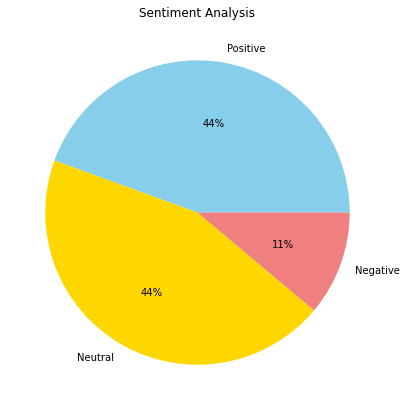

In [147]:
plt.figure(figsize=(10,7))
labels = ['Positive','Neutral','Negative']
colors = ['skyblue', 'gold', 'lightcoral']
plt.pie(data['Analysis_Outcome'].value_counts(), labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Sentiment Analysis")
plt.show()

In [148]:
tweets_list_negative = data[data['Analysis_Outcome']=='Negative']
tweets_list_positive = data[data['Analysis_Outcome']=='Positive']
tweets_list_neutral = data[data['Analysis_Outcome']=='Neutral']

In [149]:
negatives = len(tweets_list_negative)
positives = len(tweets_list_positive)
neutral = len(tweets_list_neutral)

In [150]:
def createWordCloud(text):
    # Word Cloud Visualization
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    plt.imshow(wc, interpolation='bilinear')

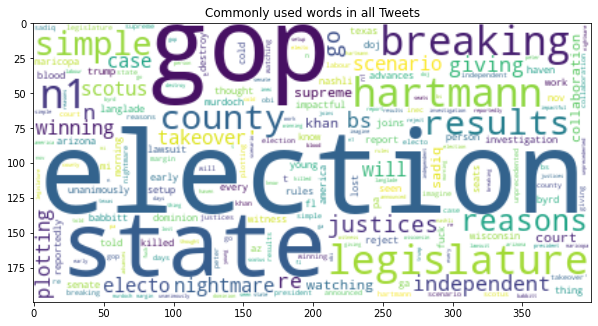

In [151]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in all Tweets')
createWordCloud(data['Tweets'].values)

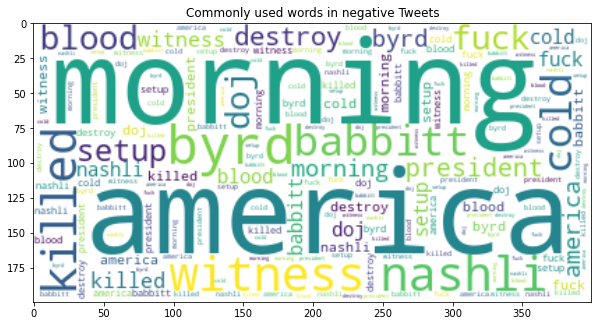

In [152]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in negative Tweets')
createWordCloud(tweets_list_negative['Tweets'].values)

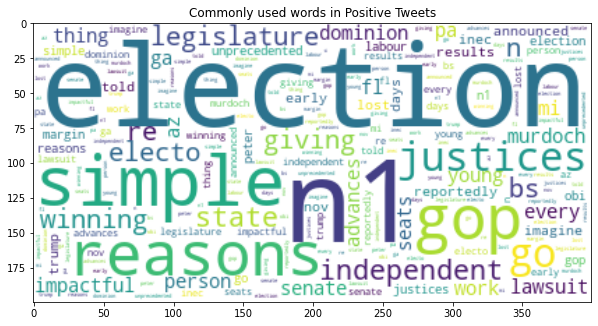

In [153]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Positive Tweets')
createWordCloud(tweets_list_positive['Tweets'].values)

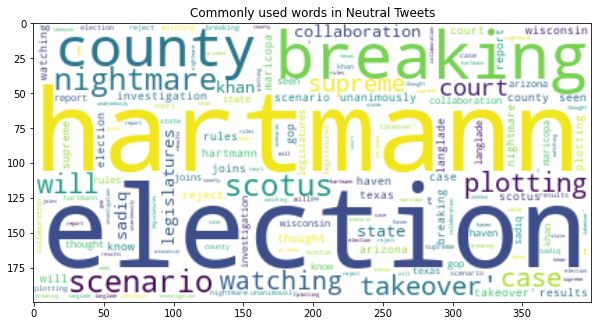

In [154]:
plt.figure(figsize=(10,8))
plt.title('Commonly used words in Neutral Tweets')
createWordCloud(tweets_list_neutral['Tweets'].values)